# Task 1ML
1. Perform the procedure of selecting variables for the model and choose the appropriate model for estimating the effectiveness of learning.
2. Determine the significance of individual variables in the model estimating the effectiveness of learning
3. Examine the impact of individual variables on the final assessment and interpret accordingly.
4. Use the visualization tool you know to easily interpret the solution.
5. Perform statistical analysis of the following variables using the rules you know.
### Variable description
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10
hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 19
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
"""
@author: KozakAnna
"""
import os
os.getcwd()

import pandas as pd

import numpy as np
np .__version__
import seaborn as sns
import sklearn as sk
sk .__version__
import scipy
scipy.__version__

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import pyplot

import pickle
import joblib

import seaborn as sn
import scipy.stats as stats
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics 

In [2]:
data = pd.read_excel(r'C:\Users\KozakAnn\PRE\task1-student-mat.xlsx') 
data.shape

(395, 33)

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data_sample=data.sample(n=20)
data.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [5]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
pd.DataFrame(data.dtypes.value_counts())

,0
object,17
int64,16


In [7]:
df=data
df_y=df[["G3"]]
df_X = df.drop(columns="G3")
df_X.shape

(395, 32)

In [8]:
categorical_vars = df_X.describe(include=["object"]).columns
categorical_vars

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [9]:
continuous_vars = df_X.describe().columns
continuous_vars

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [10]:
df_Xk = pd.get_dummies(df_X)
df_Xk.head().T

,0,1,2,3,4
age,18,17,15,15,16
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
traveltime,2,1,1,1,1
studytime,2,2,2,3,2
failures,0,0,3,0,0
famrel,4,5,4,3,4
freetime,3,3,3,2,3
goout,4,3,2,2,2
Dalc,1,1,2,1,1


In [11]:
df_Xk.shape

(395, 58)

In [12]:
continuous_vars_k = df_Xk.describe().columns
continuous_vars_k

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [13]:
df=data
df.G3.value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


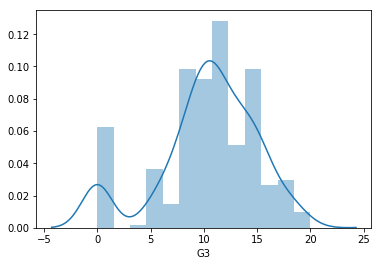

In [14]:
sn.distplot(df["G3"])

[Text(0, 0.5, 'G3'), Text(0.5, 0, 'Dalc'), Text(0.5, 1.0, 'Box Plot On Dalc')]

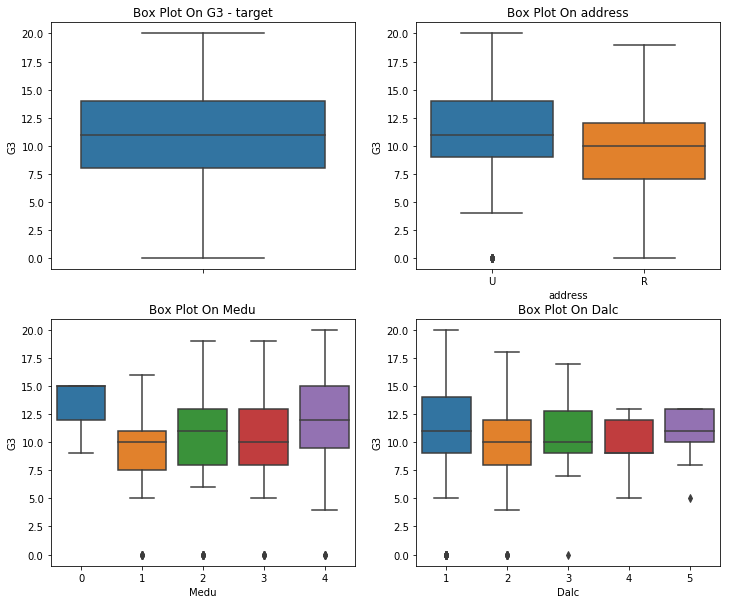

In [15]:
# Stworzenie płórna i obiektu z wykresami
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

#'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
 #      'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
  #     'nursery', 'higher', 'internet', 'romantic'
# Cztery boxploty
sn.boxplot(data=df,y="G3",orient="v",ax=axes[0][0])
sn.boxplot(data=df,y="G3",x="address",orient="v",ax=axes[0][1]) 
sn.boxplot(data=df,y="G3",x="Medu",orient="v",ax=axes[1][0]) 
sn.boxplot(data=df,y="G3",x="Dalc",orient="v",ax=axes[1][1]) 

# Wizualizacja - konfiguracja osi
axes[0][0].set(ylabel='G3',title="Box Plot On G3 - target")
axes[0][1].set(xlabel='address', ylabel='G3',title="Box Plot On address")
axes[1][0].set(xlabel='Medu', ylabel='G3',title="Box Plot On Medu")
axes[1][1].set(xlabel='Dalc', ylabel='G3',title="Box Plot On Dalc")

In [16]:
continuous_vars

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

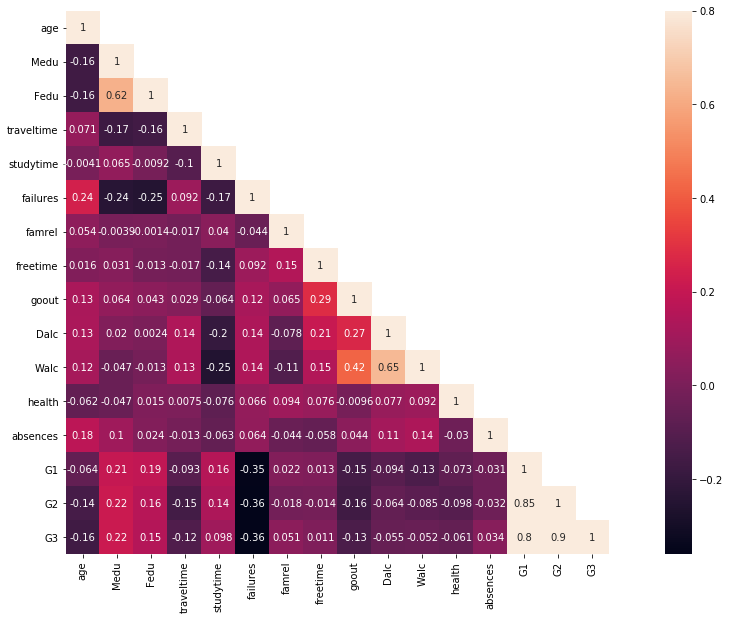

In [17]:
#zmienne ciągle
corrMatt = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',"G3"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = 0 # Usunięcie eartości z maciezy dolnotrójkątnej
mask
# Zamieniamy naarraya numpy'ego
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask = mask, vmax=.8, square=True,annot=True)

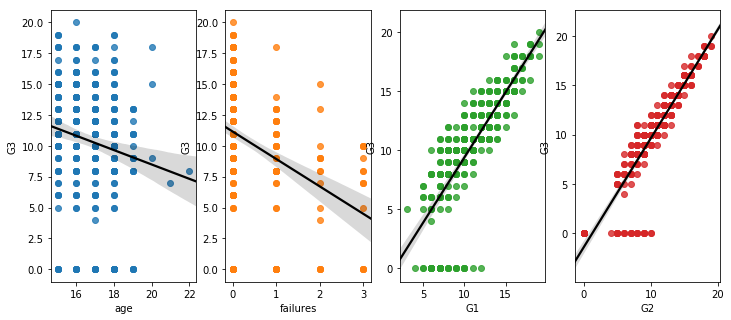

In [18]:
# Wykresy kropkowe z regresją:
fig,(ax1,ax2,ax3,ax4 )= plt.subplots(ncols=4)
fig.set_size_inches(12, 5)
sn.regplot(x="age", y="G3", data=df,ax=ax1, line_kws = {'color' : 'black'})
sn.regplot(x="failures", y="G3", data=df,ax=ax2, line_kws = {'color' : 'black'})
sn.regplot(x="G1", y="G3", data=df, ax=ax3, line_kws = {'color' : 'black'})
sn.regplot(x="G2", y="G3", data=df, ax=ax4, line_kws = {'color' : 'black'})
#Medu, Fedu


In [19]:
continuous_vars

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


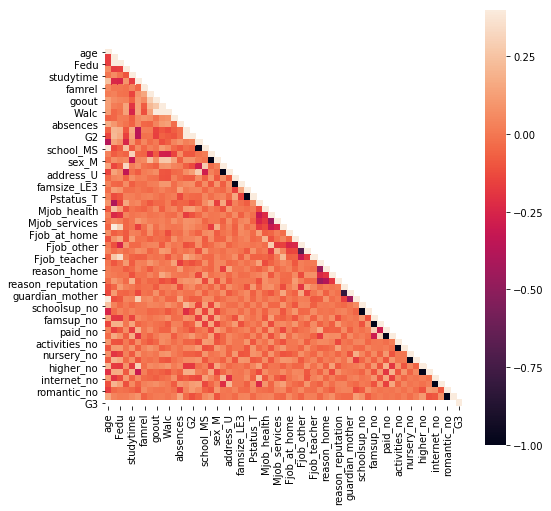

In [20]:
#zmienne ciągle
df_y=pd.DataFrame(df_y)      
df_Xk=pd.DataFrame(df_Xk)    
dfk=pd.concat([df_y.reset_index(drop=False), df_Xk.reset_index(drop=False)])

corrMatt = dfk[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
      'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes',                 "G3"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = 0 # Usunięcie eartości z maciezy dolnotrójkątnej
mask
# Zamieniamy naarraya numpy'ego
fig,ax= plt.subplots()
fig.set_size_inches(8,8)
sn.heatmap(corrMatt, mask = mask, vmax=.4, square=True,annot=False)

#### 1. Model 
model na danych po transformacji (58 zmiennych), zmienne kategorie 0/1
podział zbioru na test/train 0.3

In [21]:
X = df_Xk[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes' ]]
y = df_y["G3"]
X.shape
# =============================================================================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 
                                                #    ,stratify=y  
                                                    )
X_train.shape


(276, 58)

In [22]:
X_test.shape

(119, 58)

In [23]:
from sklearn.feature_selection import SelectKBest, chi2
KBest = SelectKBest(chi2, k=20).fit(X_train, y_train) 
f = KBest.get_support(1) #the most important features
X_new = X_train[X_train.columns[f]] # final features`
X_new=X_new.sample(n=10)
X_new.T


,243,325,8,290,65,153,265,26,222,261
failures,0,0,0,0,0,3,0,0,0,0
Dalc,1,2,1,1,1,1,3,1,1,1
Walc,2,2,1,4,2,1,4,2,1,1
health,5,3,1,5,1,4,1,5,3,3
absences,0,3,0,11,2,0,13,2,2,2
G1,13,9,16,12,16,5,17,12,16,8
G2,12,12,18,11,15,0,17,12,16,8
Pstatus_A,0,0,1,0,0,0,1,0,0,0
Mjob_at_home,0,0,0,0,0,0,0,0,0,0
Mjob_health,0,0,0,0,0,0,0,0,0,0


In [24]:

variable_wybrane = X_new.describe().columns
variable_wybrane

Index(['failures', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_services',
       'Fjob_teacher', 'reason_other', 'reason_reputation', 'schoolsup_yes',
       'paid_no', 'paid_yes', 'higher_no', 'internet_no', 'romantic_yes'],
      dtype='object')

In [25]:
predictors = X_train.columns.tolist()
models = []

models.append(("LinearRegression",LinearRegression()))
models.append(("DecisionTreeRegressor",DecisionTreeRegressor()))
models.append(("RandomForestRegressor",RandomForestRegressor()))
rf2=RandomForestRegressor(n_estimators=20)
models.append(("RandomForestRegressor2",rf2))
rf3=RandomForestRegressor(n_estimators=50)
models.append(("RandomForestRegressor3",rf3))
models.append(("ExtraTrees",ExtraTreesRegressor()))
 
results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train[predictors], y_train, scoring='neg_mean_absolute_error', cv=5)
    names.append(name)
    results.append(result)
    

for i in range(len(names)):
    print(names[i],results[i].mean())

LinearRegression -1.380855324485085
DecisionTreeRegressor -1.0649350649350648
RandomForestRegressor -0.985909090909091
RandomForestRegressor2 -0.9852987012987013
RandomForestRegressor3 -0.9875376623376624
ExtraTrees -1.081412337662338


In [26]:
predictors = X_train.columns.tolist()
models = []

models.append(("LinearRegression",LinearRegression()))
models.append(("DecisionTreeRegressor",DecisionTreeRegressor()))
models.append(("RandomForestRegressor",RandomForestRegressor()))
rf2=RandomForestRegressor(n_estimators=20)
models.append(("RandomForestRegressor2",rf2))
rf3=RandomForestRegressor(n_estimators=50)
models.append(("RandomForestRegressor3",rf3))
models.append(("ExtraTrees",ExtraTreesRegressor()))
 
results = []
names = []
fits=[]
predicts_train=[]
predicts_test=[]
for name,model in models:
    result = cross_val_score(model, X_train[predictors], y_train, scoring='neg_mean_absolute_error', cv=5)
    names.append(name)
    results.append(result)
    
    fit=model.fit(X_train, y_train)
    fits.append(fit)
    predict_train = model.predict(X_train)
    predict_test  = model.predict(X_test)
    predicts_train.append(predict_train)
    predicts_test.append(predict_test)
    
#print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
#print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))
#print('MAE on train data: ', mean_absolute_error(y_train, predict_train)**(0.5))
    

for i in range(len(names)):
    print(names[i],results[i].mean())
    print('RMSE on train data: ',  mean_absolute_error(y_train, predicts_train[i])**(0.5))
    print('RMSE on test data: ',  mean_squared_error(y_test, predicts_test[i])**(0.5))
    print('MAE on train data: ',  mean_squared_error(y_train, predicts_train[i])**(0.5))
    print('MAE on test data: ',  mean_absolute_error(y_test, predicts_test[i])**(0.5))
    
    

LinearRegression -1.380855324485085
RMSE on train data:  1.0708222768711095
RMSE on test data:  2.234503889185427
MAE on train data:  1.645215344328471
MAE on test data:  1.2349314040732042
DecisionTreeRegressor -1.0464285714285715
RMSE on train data:  0.0
RMSE on test data:  2.3639448585188374
MAE on train data:  0.0
MAE on test data:  1.1264579721521837
RandomForestRegressor -0.9843714285714287
RMSE on train data:  0.5891839111511958
RMSE on test data:  1.8203836515019194
MAE on train data:  0.5289026786453825
MAE on test data:  1.0364775512695459
RandomForestRegressor2 -1.0473863636363636
RMSE on train data:  0.6142923346939698
RMSE on test data:  1.7933525714086873
MAE on train data:  0.6193805343864236
MAE on test data:  1.0490091363125618
RandomForestRegressor3 -0.9562103896103897
RMSE on train data:  0.603912365271267
RMSE on test data:  1.8118693629054208
MAE on train data:  0.6192386629879714
MAE on test data:  1.0389069886628144
ExtraTrees -1.1077961038961037
RMSE on train da

In [27]:
# zmiana na regressor
rf = RandomForestRegressor(n_estimators=50, # liczba drzew w lesie losowym 100, 50
                           max_depth=10, # maksymalna głębokość 7 10
                           min_samples_split=10, # minimalna liczba obserwacji w gałęzi
                           min_samples_leaf=7, # minimalna liczba obserwacji na liściu
                           max_features = 'auto') # liczba kolumn losowanych do pojedynczego
rf.fit(X = X_train, y = y_train)

y_pred = rf.predict(X_test)

feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances


,importance
G2,8.475091e-01
absences,1.133678e-01
age,1.113233e-02
G1,3.115634e-03
guardian_mother,3.000926e-03
Medu,2.884765e-03
reason_home,2.857505e-03
failures,2.548878e-03
reason_course,2.067182e-03
Walc,1.780651e-03


In [28]:
variable_wybrane

Index(['failures', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_services',
       'Fjob_teacher', 'reason_other', 'reason_reputation', 'schoolsup_yes',
       'paid_no', 'paid_yes', 'higher_no', 'internet_no', 'romantic_yes'],
      dtype='object')

In [29]:
ile=17
from sklearn.feature_selection import SelectKBest, chi2
KBest = SelectKBest(chi2, k=ile).fit(X_train, y_train) 
f = KBest.get_support(1) #the most important features
X_new = X_train[X_train.columns[f]] # final features`


variable_wybrane = X_new.describe().columns
variable_wybrane

X_train_wybrane=X_train[variable_wybrane]
X_test_wybrane=X_test[variable_wybrane]

rf_wybrane = RandomForestRegressor(n_estimators=50, # liczba drzew w lesie losowym 100, 50
                           max_depth=10, # maksymalna głębokość 7 10
                           min_samples_split=10, # minimalna liczba obserwacji w gałęzi
                           min_samples_leaf=7, # minimalna liczba obserwacji na liściu
                           max_features = 'auto') # liczba kolumn losowanych do pojedynczego
rf_wybrane.fit(X = X_train_wybrane, y = y_train)


#wyniki

y_pred = rf_wybrane.predict(X_test_wybrane)

feature_importances = pd.DataFrame(rf_wybrane.feature_importances_, index = X_train_wybrane.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances


,importance
G2,0.887470
absences,0.097663
G1,0.005685
romantic_yes,0.004838
Walc,0.001678
failures,0.001022
Dalc,0.000454
paid_no,0.000352
Mjob_services,0.000312
paid_yes,0.000303


In [30]:
predict_train = rf_wybrane.predict(X_train_wybrane)
predict_test = rf_wybrane.predict(X_test_wybrane)
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))
print('MAE on train data: ', mean_absolute_error(y_train, predict_train)**(0.5))
print('MAE on test data: ',  mean_absolute_error(y_test, predict_test)**(0.5))

RMSE on train data:  1.4094576900468723
RMSE on test data:  1.7585898552830725
MAE on train data:  0.9183895193814298
MAE on test data:  1.050321975086866


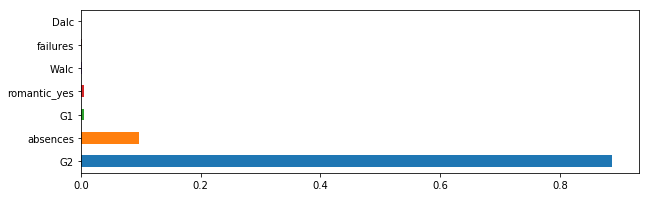

In [31]:
# plot the 7 most important features 
plt.figure(figsize=(10,3))
feat_importances = pd.Series(rf_wybrane.feature_importances_, index = X_train_wybrane.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [50, 100,200]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features = ['auto']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 30, num = 2)]
#max_depth.append(None)

max_depth = [int(x) for x in np.linspace(10, 30, num = 2)]
# Minimum number of samples required to split a node
min_samples_split = [2,4,8,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,4,8,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }
from pprint import pprint
pprint(random_grid)

# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 4, 
                               scoring="neg_mean_absolute_error",
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X = X_train_wybrane, y = y_train)

y_pred = rf_random.predict(X_test_wybrane) 

# get importance
#importance = regressor.feature_importances_
#feature_importances = pd.DataFrame(importance, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
#feature_importances
rf_random.cv_results_
results = rf_random.cv_results_
rf_random.best_params_

rf_random.best_estimator_
rf_random.best_score_

{'bootstrap': [True, False],
 'max_depth': [10, 30],
 'max_features': ['auto'],
 'min_samples_leaf': [2, 4, 8, 10],
 'min_samples_split': [2, 4, 8, 10],
 'n_estimators': [50, 100, 200]}
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.2s finished


-1.1223453329206698

In [56]:
rf_random.best_score_

-1.1223453329206698

In [57]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 30],
 'max_features': ['auto'],
 'min_samples_leaf': [2, 4, 8, 10],
 'min_samples_split': [2, 4, 8, 10],
 'n_estimators': [50, 100, 200]}


In [58]:
rf_random.best_params_

{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}

In [59]:
predict_train = rf_random.predict(X_train_wybrane)
predict_test  = rf_random.predict(X_test_wybrane)
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))
print('MAE on train data: ', mean_absolute_error(y_train, predict_train)**(0.5))
print('MAE on test data: ',  mean_absolute_error(y_test, predict_test)**(0.5))

RMSE on train data:  1.4330530911787291
RMSE on test data:  1.7049608997781285
MAE on train data:  0.9296073215573869
MAE on test data:  1.0319673692320255


In [60]:
w_score=pd.DataFrame(metrics.get_scorer(y_pred))
w_score_2 = pd.concat( [X_test_wybrane.reset_index(drop=False), 
                        #  X_test.reset_index(drop=False), 
                          y_test.reset_index(drop=False), 
                          w_score.reset_index(drop=True)],  axis=1) 
w_score_2=w_score_2.sample(n=10).T
w_score_2

,17,9,49,113,89,66,42,28,26,61
index,272.000000,116.000000,196.000000,79.000000,131.000000,255.000000,329.000000,101.000000,77.000000,193.000000
failures,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Dalc,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
Walc,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,4.000000
absences,2.000000,2.000000,4.000000,12.000000,0.000000,2.000000,4.000000,0.000000,0.000000,8.000000
G1,11.000000,11.000000,17.000000,5.000000,8.000000,7.000000,14.000000,16.000000,11.000000,8.000000
G2,11.000000,13.000000,15.000000,5.000000,0.000000,9.000000,14.000000,17.000000,11.000000,9.000000
Mjob_at_home,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mjob_health,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Mjob_services,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000


#### Summary
model RF daje najlepszy wynik na wybranej liczbie 17 zmiennych 

wyjściowy model RF
MAE on train data:  0.5289026786453825
MAE on test data:  1.0364775512695459

model RF na wybranych zmiennych
MAE on train data:  0.9183895193814298
MAE on test data:  1.050321975086866

model RF na wybranych zmiennych z hiperparametrami , wyższy MAE na train, ale na test znacznie sie zmniejsza
MAE on train data:  0.9296073215573869
MAE on test data:  1.0319673692320255


Next steps
z uwagi na 6 % udział zdarzeń z wynikiem 0, lepiej byłoby podejść do problemu najpierw dokonując klasyfikacji na dwie kategorie 0/wyższy wynik, a potem dopiero szacować dokładny wynik, być może to pozwoliłoby lepiej wyjaśnić model w tej frakcji.

W przypadku modelu RF na kategoriach na podstawie future_importance określamy jedynie poziom istotności zmiennych na ile brały udział w tworzeniu kolejnych podziałów. RF nie da nam bezpośrednio inerpretowalnych coef przy parametrach. Znak wpływu (+/-) możemy ocenić na podstawie macieszy korelacji.
